In [28]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [29]:
sub = os.listdir('/kaggle/input/ml4scitest5/lenses/sub')
no_sub = os.listdir('/kaggle/input/ml4scitest5/lenses/no_sub')

In [30]:
X = []
y = []

for i in sub:
    img = cv2.imread('/kaggle/input/ml4scitest5/lenses/sub/'+i)
    X.append(img)
    y.append(1)

for i in no_sub:
    img = cv2.imread('/kaggle/input/ml4scitest5/lenses/no_sub/'+i)
    X.append(img)
    y.append(0)

X = np.array(X)
y = np.array(y)

In [31]:
X.shape, y.shape

((10000, 150, 150, 3), (10000,))

In [32]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [33]:
model = tf.keras.applications.ResNet50(
    include_top=True,
    input_shape=(150, 150, 3),
    weights=None,
    classes=2,
    classifier_activation='softmax'
)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
history = model.fit(train_X, train_y, epochs=100, validation_data=(test_X, test_y))

Epoch 1/100
282/282 [==============================] - 62s 110ms/step - loss: 0.7283 - accuracy: 0.6098 - val_loss: 28.9238 - val_accuracy: 0.4920
Epoch 2/100
282/282 [==============================] - 30s 106ms/step - loss: 0.4605 - accuracy: 0.7522 - val_loss: 24.1245 - val_accuracy: 0.4850
Epoch 3/100
282/282 [==============================] - 30s 107ms/step - loss: 0.2799 - accuracy: 0.8684 - val_loss: 1.4788 - val_accuracy: 0.6040
Epoch 4/100
282/282 [==============================] - 30s 106ms/step - loss: 0.2227 - accuracy: 0.9009 - val_loss: 142.3418 - val_accuracy: 0.4910
Epoch 5/100
282/282 [==============================] - 30s 106ms/step - loss: 0.1992 - accuracy: 0.9130 - val_loss: 156.4812 - val_accuracy: 0.4920
Epoch 6/100
282/282 [==============================] - 30s 106ms/step - loss: 0.1645 - accuracy: 0.9272 - val_loss: 465.1530 - val_accuracy: 0.4920
Epoch 7/100
282/282 [==============================] - 30s 106ms/step - loss: 0.1316 - accuracy: 0.9452 - val_loss: 

32/32 [==============================] - 1s 30ms/step


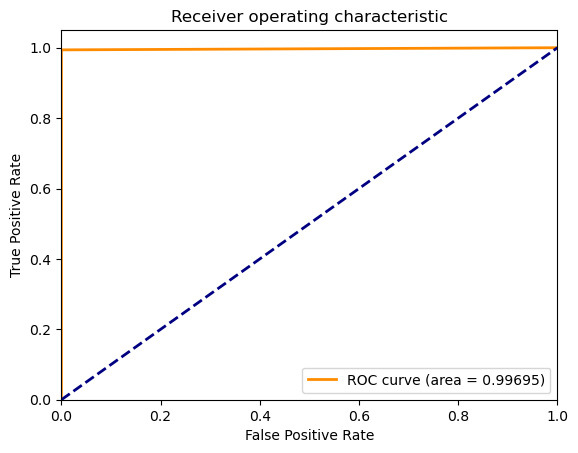

In [36]:
# roc
y_pred = model.predict(test_X)
y_pred = np.argmax(y_pred, axis=1)
fpr, tpr, _ = roc_curve(test_y, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.5f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [37]:
model.save("XCeptionAUC99695.h5")